# CO543 - Image Processing 
##  Lab 04 - Pattern Recognition
### E/17/297


In [1]:
folder = '/content/drive/MyDrive/CO543/Lab 4/'

## 1. Using K-means algorithm Identify the different clusters of MNIST Handwritten Digits Dataset : https://www.kaggle.com/c/digit-recognizer

#### a. Briefly describe the elbow method and the silhouette method


#### These two methods are used to choose the value of 'K' in K-Means Clustering.
####   **Elbow Method**
#### It is an empirical method to find out the best value of k. it picks up the range of values and takes the best among them. It calculates the sum of the square of the points and calculates the average distance.
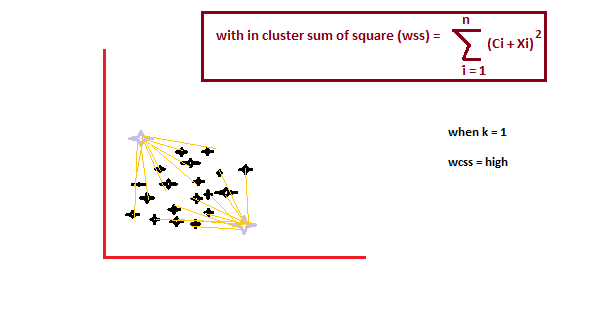

#### When the value of k is 1, the within-cluster sum of the square will be high. As the value of k increases, the within-cluster sum of square value will decrease.Finally, we will plot a graph between k-values and the within-cluster sum of the square to get the k value. we will examine the graph carefully. At some point, our graph will decrease abruptly. That point will be considered as a value of k.


#### **Silhouette Method**

#### The silhouette method is somewhat different. The elbow method it also picks up the range of the k values and draws the silhouette graph. It calculates the silhouette coefficient of every point. It calculates the average distance of points within its cluster a (i) and the average distance of the points to its next closest cluster called b (i).
#### Then calculate the silhouette coefficient by using the below formula.
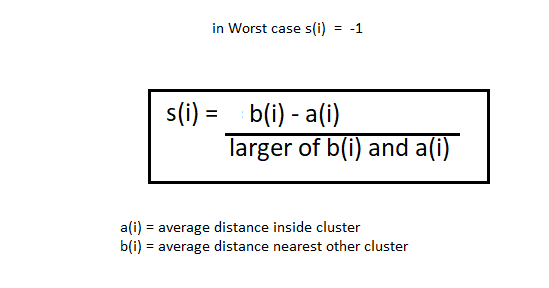

#### Now, we can calculate the silhouette coefficient of all the points in the clusters and plot the silhouette graph. This plot will also helpful in detecting the outliers. The plot of the silhouette is between -1 to 1. Observe the plot and check which of the k values is closer 1.
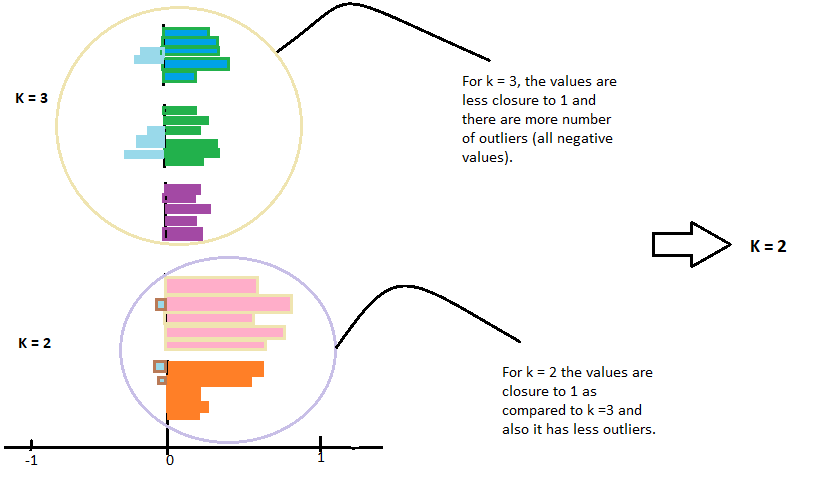


In [2]:
# import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Show the data
df_train_show = pd.read_csv(folder + 'train.csv')
df_train_show.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
sorted(df_train_show['label'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [5]:
# read the dataset as numpy array
df_train = pd.read_csv(folder + 'train.csv').to_numpy()
df_test = pd.read_csv(folder + 'test.csv').to_numpy()

### b. Mention the criteria behind the way you define number of clusters

#### We can choose cluster size as 10 since there are 10 handwritten digits.

In [6]:
#Import Kmeans function
from sklearn.cluster import MiniBatchKMeans

#seperate dataset into data(X) and labels(Y)
x_df_train = df_train[:,1:]
y_df_labels = df_train[:,0] #labels are at the 0 index 

In [7]:
# seting number of clusters as 10
k_means_model = MiniBatchKMeans(n_clusters=10, max_iter=10000)

k_means_model.fit(x_df_train)

# predictions
predictions = k_means_model.labels_




In [8]:
predictions.shape

(42000,)

In [9]:
# store data in 10 clusters using the predictions
clusters = {i: [] for i in range(10)}

for i in range(len(predictions)):
  clusters[predictions[i]].append(i)





### c. Visualize each cluster and justify the reasons for misclusted images(eg: 5 is in 8’s cluster).

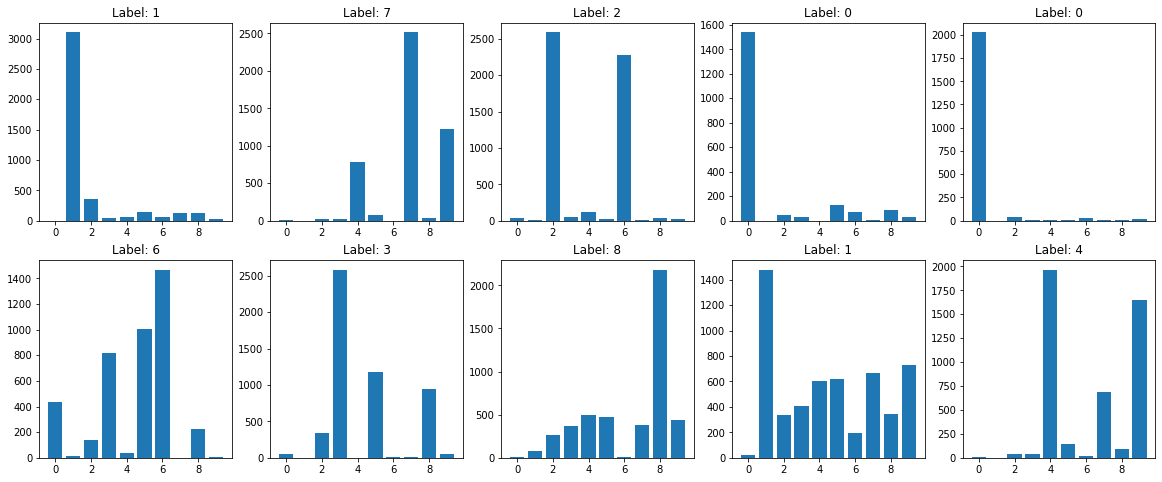

In [10]:

fig, ax = plt.subplots(2, 5,  figsize=(20,8))
row = 0
col = 0
x_val = range(0,10)

for k in range(len(clusters)):
  labels = []
  
  
  for item in clusters[k]: 
    labels.append(y_df_labels[item])

  bin = np.bincount(labels)
  ax[row][col].bar(x_val,bin)
  ax[row][col].set_title("Label: {label}".format(label = bin.argmax()))

  if row==0 and col==4:
    row=row+1
  
  col = col +1
  if col==5:
    col=0



#### Digits in this data set are handwritten.Therefore there can be many variations among digit images.So using 10 clusters to cluster them won't be accurate.

### d. Suggest the ways to reduce the cluster errors.

#### We can reduce these cluster errors by increasing number of clusters.We can use either elbow method or silhouette method to select a best value for number of clusters(K)

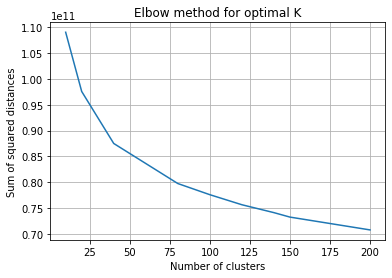

In [11]:
# use elbow method

number_of_clusters = [10,20,40,80,100,120,140,150,200]
inertia = []

for k in number_of_clusters:
  k_means_model = MiniBatchKMeans(n_clusters=k, max_iter=1000)
  k_means_model.fit(x_df_train)
  inertia.append(k_means_model.inertia_)

#plot
plt.plot(number_of_clusters, inertia)
plt.title("Elbow method for optimal K")
plt.xlabel("Number of clusters")
plt.ylabel("Sum of squared distances")
plt.grid()

### according to the plot we can see that bend of the elbow is nearly at about 40

In [12]:
from sklearn.metrics import accuracy_score

# Identify the cluster  with the number
def identify_Cluster(cluster_labels,y):
  reference_labels = {}

  for i in range(len(np.unique(k_means_model.labels_))):
    index = np.where(cluster_labels == i,1,0)

    num = np.bincount(y[index==1]).argmax()

    reference_labels[i] = num

  return reference_labels


In [13]:
for k in [10,40]:
  k_means_model = MiniBatchKMeans(n_clusters=k, max_iter=1000)
  k_means_model.fit(x_df_train)

  reference_labels = identify_Cluster(k_means_model.labels_,y_df_labels)

  predicted_labels = np.random.rand(len(k_means_model.labels_))

  for i in range(len(k_means_model.labels_)):
    predicted_labels[i] = reference_labels[k_means_model.labels_[i]]

  #accuracy
  print(accuracy_score(predicted_labels,y_df_labels)*100)




49.957142857142856
75.07619047619048


### we can see that accuracy has been increased with the cluster size.When we use cluster size as 40 which we obtained from elbow method we can see that accuracy has been increased from 25%

# 2. Using Artificial neural network and convolutional neural network Identify the different classes of MNIST Fashion dataset. Dataset : https://www.kaggle.com/zalando-research/fashionmnist

In [14]:
import tensorflow as tf
from tensorflow import keras


In [15]:
# load dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) =fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [16]:
train_images.shape

(60000, 28, 28)

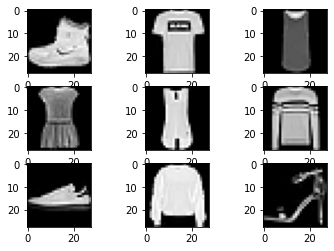

In [17]:
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(train_images[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [18]:
# normalize the data
# scale the values to a range of 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# # reshaping data set
# x_train = train_images.reshape(-1,28*28)
# x_test = test_images.reshape(-1,28*28)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images.shape

(60000, 28, 28)

### a. Initially train a classifier using artificial neural network while treating pixels as different features


In [19]:
model = keras.Sequential([
      keras.layers.Flatten(input_shape=(28,28)), #first layer
      keras.layers.Dense(128, activation=tf.nn.relu, input_shape=(784,)),
      #dropout layer to avoid overfitting
      keras.layers.Dropout(0.2),
      #output layer
      keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [20]:
from sklearn import metrics
# compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
# train the model
model.fit(train_images, train_labels, epochs=5, validation_split=0.2 )


Epoch 1/5
1500/1500 [==============================] - 8s 4ms/step - loss: 0.5506 - accuracy: 0.8060 - val_loss: 0.4145 - val_accuracy: 0.8499
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4127 - accuracy: 0.8499 - val_loss: 0.3681 - val_accuracy: 0.8645
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3753 - accuracy: 0.8620 - val_loss: 0.3642 - val_accuracy: 0.8704
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3524 - accuracy: 0.8714 - val_loss: 0.3565 - val_accuracy: 0.8723
Epoch 5/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3381 - accuracy: 0.8772 - val_loss: 0.3535 - val_accuracy: 0.8697


In [22]:
# evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3800 - accuracy: 0.8624


### b. Train a Convolutional neural network(CNN) for the above data set considering data points as images.


In [23]:
#reshape the data set
train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

In [24]:
train_images.shape

(60000, 28, 28, 1)

In [25]:
# normalize the data
# scale the values to a range of 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0


In [26]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# Take a look at the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 7, 7, 32)         

In [27]:
# compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [45]:
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2 )

Epoch 1/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.5648 - accuracy: 0.7883 - val_loss: 0.4597 - val_accuracy: 0.8301
Epoch 2/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.5518 - accuracy: 0.7913 - val_loss: 0.4600 - val_accuracy: 0.8313
Epoch 3/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.5412 - accuracy: 0.7980 - val_loss: 0.4573 - val_accuracy: 0.8328
Epoch 4/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.5374 - accuracy: 0.7998 - val_loss: 0.4518 - val_accuracy: 0.8322
Epoch 5/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.5251 - accuracy: 0.8040 - val_loss: 0.4374 - val_accuracy: 0.8352
Epoch 6/10
1500/1500 [==============================] - 16s 10ms/step - loss: 0.5200 - accuracy: 0.8043 - val_loss: 0.4355 - val_accuracy: 0.8391
Epoch 7/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.5165 - accuracy: 0.8061 - val_loss: 0.4215 - val_

In [57]:
# evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.4402 - accuracy: 0.8370


Text(0.5, 1.0, 'Training loss')

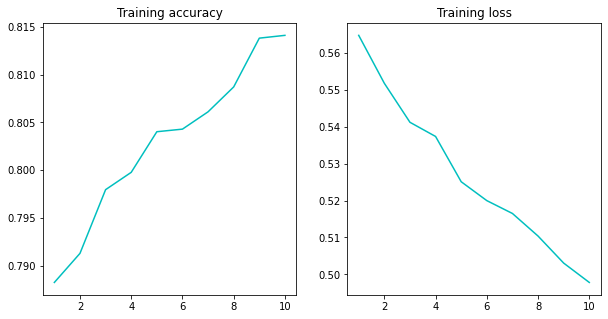

In [55]:
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(1, 11)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.plot(epochs, acc, 'c', label='Training accuracy')
ax1.set_title('Training accuracy')

ax2.plot(epochs, loss, 'c', label='Training loss')
ax2.set_title('Training loss')

### we can see that with the number of epochs increasing training accuracy and test accuracy has been increased while training loss and test loss decreased.

### d. Visualize the different layers in the CNN and identify different patterns recognized in each layer of the network.

In [60]:

layer_outputs = [layer.output for layer in model.layers]

feature_map_model = tf.keras.models.Model(inputs= model.input, outputs=layer_outputs)

feature_maps = feature_map_model.predict(train_images[15].reshape(1, 28, 28, 1))

layer_names = [layer.name for layer in model.layers]

for layer_name, feature_map in zip(layer_names, feature_maps):
  print(f'The shape of {layer_name} is {feature_map.shape}')

The shape of conv2d is (1, 28, 28, 64)
The shape of max_pooling2d is (1, 14, 14, 64)
The shape of dropout_1 is (1, 14, 14, 64)
The shape of conv2d_1 is (1, 14, 14, 32)
The shape of max_pooling2d_1 is (1, 7, 7, 32)
The shape of dropout_2 is (1, 7, 7, 32)
The shape of flatten_1 is (1, 1568)
The shape of dense_2 is (1, 256)
The shape of dropout_3 is (1, 256)
The shape of dense_3 is (1, 10)


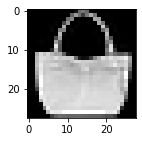

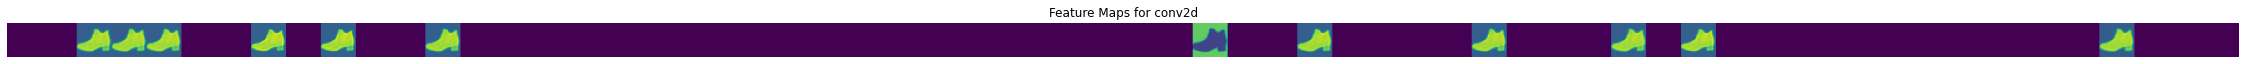

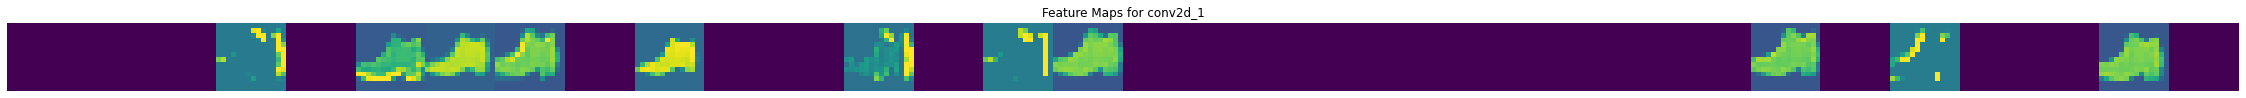

In [63]:
plt.figure(figsize=(2, 2))
plt.imshow(train_images[100].reshape(28, 28), cmap='gray')

for layer_name, feature_map in zip(layer_names, feature_maps):
    if layer_name.startswith('conv'):
        n_features = feature_map.shape[-1]
        size = feature_map.shape[1]
        image_belt = np.zeros((size, size * n_features))
        for i in range(n_features):
            feature_image = feature_map[0, :, :, i]
            feature_image -= feature_image.mean()
            feature_image /= feature_image.std()
            feature_image *= 64
            feature_image += 128
            feature_image = np.clip(feature_image, 0, 255).astype('uint8')
            image_belt[:, i * size: (i + 1) * size] = feature_image
        scale = 40. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(f'Feature Maps for {layer_name}')
        plt.grid(False)
        plt.axis('off')
        plt.imshow(image_belt, aspect='auto', cmap='viridis')

#### Increasing number of hidden layers or neurons will increase the complexity and may cause overfitting.Therefore best architecture for optimum neural network should not be too deep or too shalow.I have added a dropout layer to avoid overfitting issue for my network.